Geometric Transforms

1. Translation
2. Rotation
3. Scaling
4. Cropping
5. Flipping
6. Shearing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\hpary\OneDrive\Documents\CV\images\sr2.jpg"

# Translation

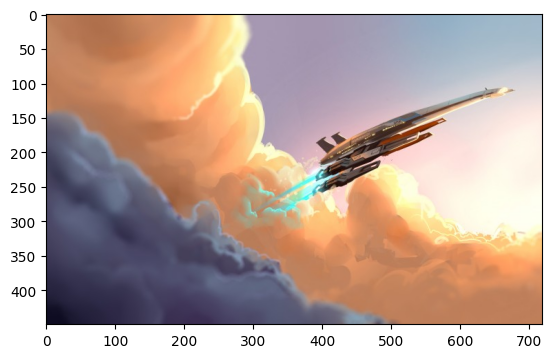

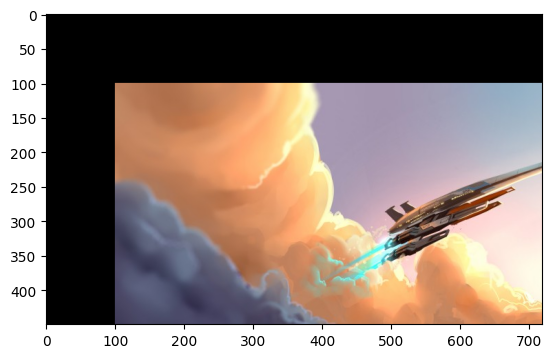

In [2]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                     #BGR 2 RGB for plotting using matplotlib
h, w = img.shape[:2]

x = 100
y = 100

t_matrix = np.float32([[1,0,x], [0,1,y]])                      #Creating translation matrix
n_img = cv2.warpAffine(img, t_matrix, (w, h))

plt.imshow(img)
plt.show()
plt.imshow(n_img)
plt.show()

# Rotation

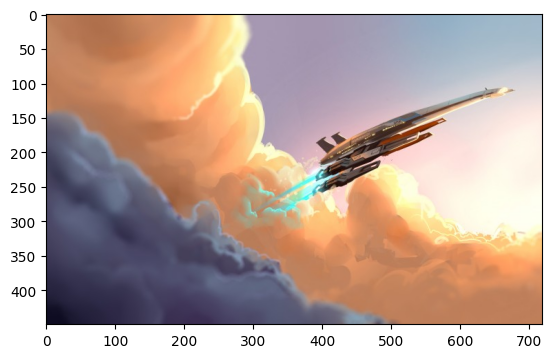

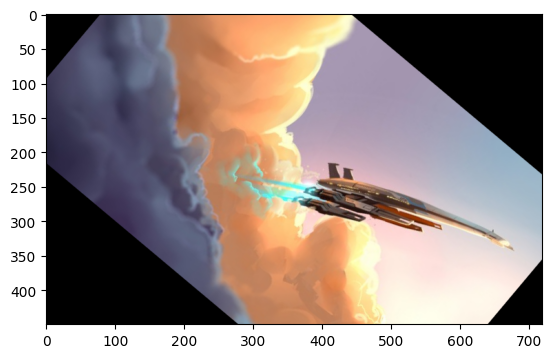

In [3]:
h, w = img.shape[:2]

center = (w//2, h//2)
ang = -40                #Positive value for anti-clockwise & negative for clockwise
r_matrix = cv2.getRotationMatrix2D(center, ang, 1.0)            #Generating rotational matrix
r = cv2.warpAffine(img, r_matrix, (w, h))  # appling the rotation matrix to out own image

plt.imshow(img)
plt.show()
plt.imshow(r)
plt.show()

# Scaling

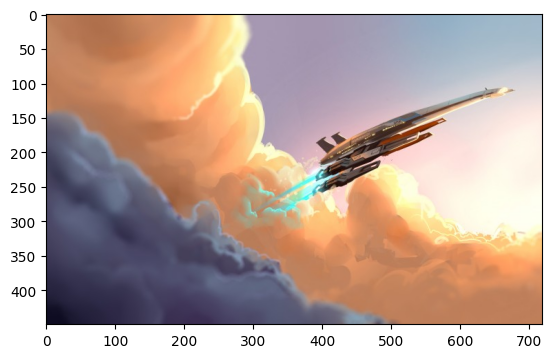

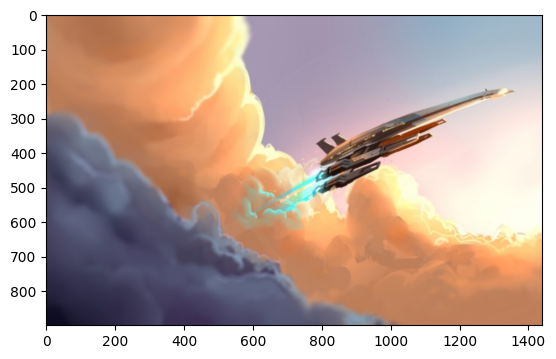

In [4]:
scale = 2                #scale>1:Img is scaled-up , scale<1:Img is scaled-down

h = int(img.shape[0] * scale)                                   #Scaling in y-axis
w = int(img.shape[1] * scale)                                   #Scaling in x-axis
re = cv2.resize(img, (w, h))                                    #Resizing img with scaled values

plt.imshow(img)
plt.show()
plt.imshow(re)
plt.show()

# Cropping

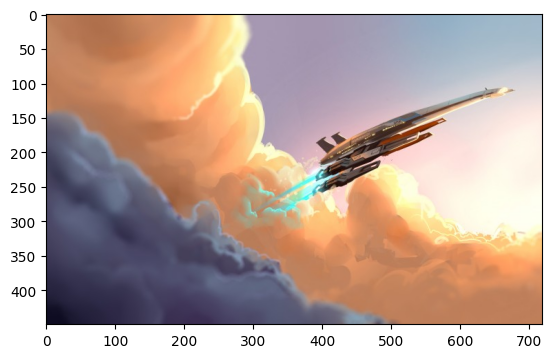

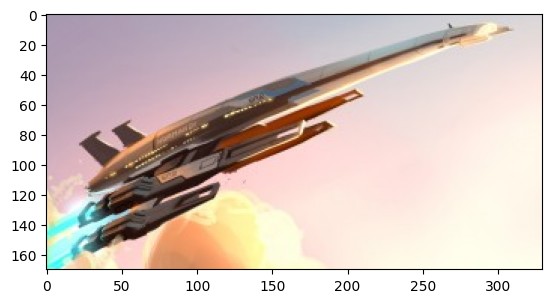

In [5]:
cxlow = 370                 #x lower limit
cxup = 700
cylow = 100
cyup = 270

crop = img[cylow:cyup, cxlow:cxup ]                             #Only displaying the selected part of img

plt.imshow(img)
plt.show()
plt.imshow(crop)
plt.show()

# Flipping using CV2.flip

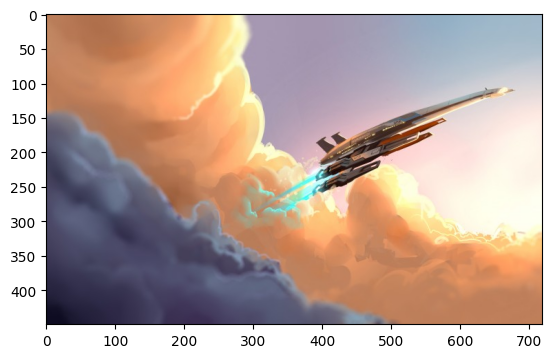

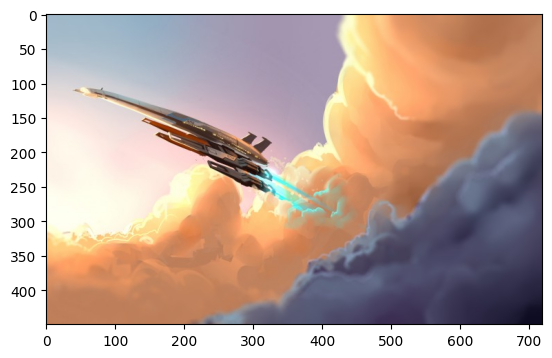

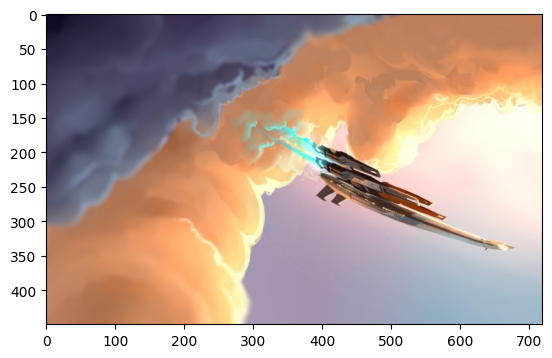

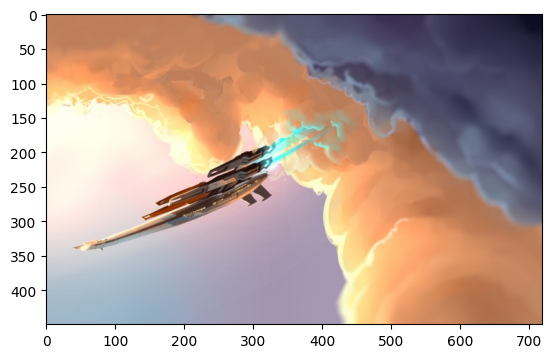

In [6]:
flip1 = cv2.flip(img, 1)
flip2 = cv2.flip(img, 0)
flip3 = cv2.flip(img, -1)

plt.imshow(img)
plt.show()

plt.imshow(flip1)
plt.show()

plt.imshow(flip2)
plt.show()

plt.imshow(flip3)
plt.show()



# Flipping using warperspective transform

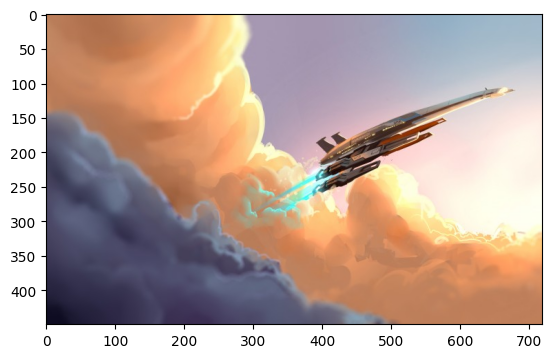

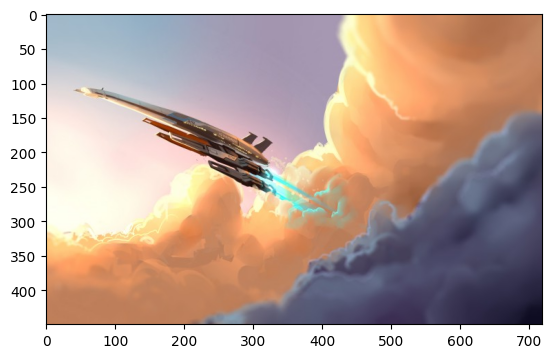

In [7]:
h, w = img.shape[:2]

m = int(input("Enter 1 for horizontal, 2 for vertical or 3 for both axes flipping: "))
if m==1:
    matrix = np.float32([[-1,0,w], [0,1,0], [0,0,1]])         #Creating matrix for horizontal flipping
    flip = cv2.warpPerspective(img, matrix, (w,h))
elif m==2:
    matrix = np.float32([[1,0,0], [0,-1,h], [0,0,1]])         #Creating matrix for vertical flipping
    flip = cv2.warpPerspective(img, matrix, (w,h))
elif m==3:
    matrix = np.float32([[-1,0,w], [0,-1,h], [0,0,1]])        #Creating matrix for flipping both axes
    flip = cv2.warpPerspective(img, matrix, (w,h))

plt.imshow(img)
plt.show()
plt.imshow(flip)
plt.show()


# Shearing

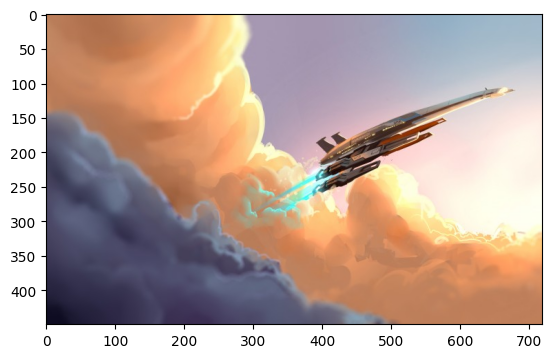

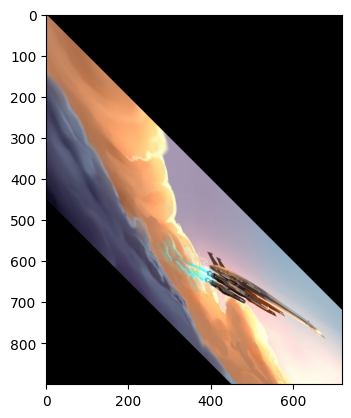

In [11]:
m = int(input("Enter 1 for horizontal and 2 for vertical shear: "))

if m==1:
    k = float(input("Enter shearing factor: "))
    sh_matrix = np.float32([[1,k,0], [0,1,0], [0,0,1]])                  #Creating shearing matrix for given factor
    sheared = cv2.warpPerspective(img, sh_matrix, (int(w*(k+1)), h))     #Increasing width by the same factor

if m==2:
    k = float(input("Enter shearing factor: "))
    sh_matrix = np.float32([[1,0,0], [k,1,0], [0,0,1]])
    sheared = cv2.warpPerspective(img, sh_matrix, (w, int(h*(k+1))))     #Increasing height by the same factor

plt.imshow(img)
plt.show()
plt.imshow(sheared)
plt.show()